# ========================================================================================
# 2m_project_7
# ========================================================================================

In [1]:
import pandas as pd
import datetime
import os
import requests
import json
import random

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys

Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. 

In [ ]:
df = pd.read_csv(r'F:\!PR\Simulation\data\7_step_1_lesson_7.csv')

In [3]:
df = pd.read_csv(r'C:\Simulation\data\7_step_1_lesson.csv')

In [8]:
df.head()

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0


Мой код:

In [4]:
df_visits_count = df.pivot(index='date', columns='user_type', values='visits').reset_index()

In [5]:
df_visits_count

user_type,date,People,Robots
0,2020-06-15,417.0,177.0
1,2020-06-16,472.0,91.0
2,2020-06-17,475.0,138.0


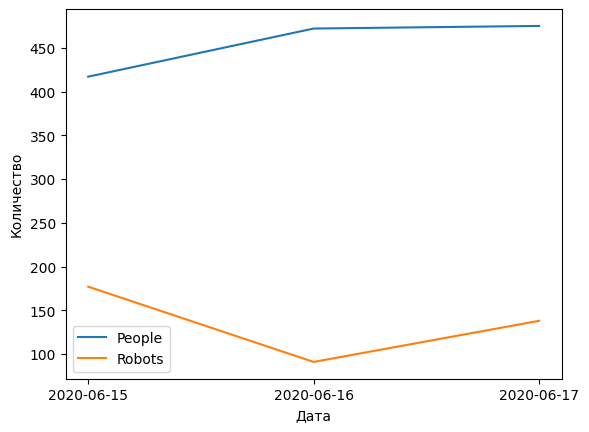

In [6]:
plt.plot(df_visits_count['date'], df_visits_count['People'], label='People')
plt.plot(df_visits_count['date'], df_visits_count['Robots'], label='Robots')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend()

Код из ответов:

<Axes: xlabel='date', ylabel='visits'>

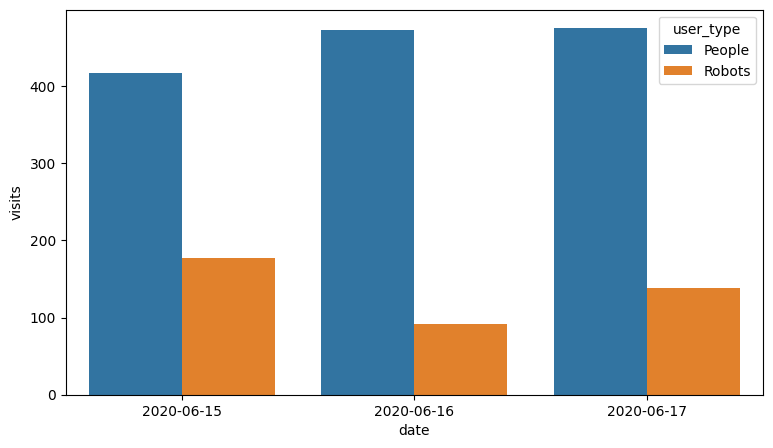

In [7]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(data=df, x='date', y='visits', hue='user_type', ax=ax)

Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Ответ округлите до целого.

In [19]:
df = pd.read_csv(r'C:\Users\PC\Desktop\Софт\Simulation\Simulation\data\7step_2_lesson_7.csv')

In [20]:
df.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [28]:
round(df.loc[df.browser == 'Google Chrome', 'visits'].iloc[0] / df.visits.sum() * 100)

60

Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?
В качестве ответа укажите название браузера.

In [37]:
df = pd.read_csv(r'C:\Users\PC\Desktop\Софт\Simulation\Simulation\data\7step_3_lesson_7.csv')

In [38]:
df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


Мой код (неправильно понял задание)

In [44]:
visit_series = df.loc[df.user_type == 'Robots']\
    .set_index('visits')['browser']

In [29]:
max_visit_index = visit_series.index.max()

In [30]:
visit_series[max_visit_index]

'Google Chrome'

Код из ответов

In [42]:
visits_ut_b = df.groupby(['browser', 'user_type']).visits.sum()
visits_ut_b.head()

browser          user_type
Android Browser  People        1.0
Chrome Mobile    People       31.0
Chromium         People        1.0
                 Robots        1.0
CocCoc           People        1.0
Name: visits, dtype: float64

In [45]:
visits_b = df.groupby(['browser']).visits.sum()
visits_b.head()

browser
Android Browser     1.0
Chrome Mobile      31.0
Chromium            2.0
CocCoc              1.0
Edge                5.0
Name: visits, dtype: float64

In [46]:
shares = visits_ut_b / visits_b
shares.loc[:, 'Robots'].sort_values(ascending=False)

browser
UCWEB               1.000000
Safari              0.536585
Firefox             0.534483
Chromium            0.500000
Opera               0.312500
Google Chrome       0.293785
Edge                0.200000
Yandex Browser      0.129630
Samsung Internet    0.111111
Mobile Safari       0.062500
Name: visits, dtype: float64

Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.  
В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.  
Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [41]:
df = pd.read_csv(r'C:\Users\PC\Desktop\Софт\Simulation\Simulation\data\7step_4_lesson_7.csv')

In [44]:
df.head()

,date,browser,user_type,visits,visits_share
0,2020-06-15,Google Chrome,People,250.0,0.421
1,2020-06-15,Google Chrome,Robots,104.0,0.175
2,2020-06-15,Yandex Browser,People,47.0,0.079
3,2020-06-15,Firefox,Robots,31.0,0.052
4,2020-06-15,Chrome Mobile,People,31.0,0.052


Мой код

In [86]:
df['visits_share'] = (df.visits / df.visits.sum()).round(3)
df.loc[(df.user_type == 'People') & (df.browser == 'Safari'), 'visits_share'].iloc[0] * 100

np.float64(3.2)

Код ИИ

In [43]:
df['visits_share'] = df.groupby('date')['visits'].transform(lambda x: x / x.sum()).round(3)
df.loc[(df.user_type == 'People') & (df.browser == 'Safari'), 'visits_share'].iloc[0] * 100

np.float64(3.2)

При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при помощи VK API себе в личку ВКонтакте. 

In [ ]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

In [ ]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

my_mail = 'praldmur@gmail.com'

# Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name(r'C:\Users\PC\Desktop\Софт\Simulation\Simulation\data\my-project-test-462911-c940cfa5fa9c.json', scope)
gs = gspread.authorize(credentials)
table_name = 'mini_project_7'
sheet_obj = gs.create(table_name)
sheet_obj.share('praldmur@gmail.com', perm_type='user', role='writer')
spreadsheet_id = sheet_obj.id

# Предполагаем, что df уже существует
df = df.reset_index(drop=True)  # Сбрасываем индексы
print(df.shape)  # (24, 5)
print(df.head())  # Проверка
print(df.isnull().sum())  # Проверка NaN

# Получаем или создаём лист
try:
    worksheet = sheet_obj.worksheet('creature_df')
except gspread.exceptions.WorksheetNotFound:
    worksheet = sheet_obj.add_worksheet(title='creature_df', rows=df.shape[0]+1, cols=df.shape[1])

# Очищаем и загружаем данные
worksheet.clear()
worksheet.update([df.columns.values.tolist()] + df.values.tolist())

print("Data uploaded successfully!")

In [53]:
link_df = f'https://docs.google.com/spreadsheets/d/{spreadsheet_id}/edit'

Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.
В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

In [55]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df_1= pd.read_csv(BytesIO(data))

In [56]:
df_1.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [61]:
df_merged = pd.merge(df, df_1, on=['date', 'browser', 'user_type'])

In [68]:
df_merged.head()

,date,browser,user_type,visits,visits_share,users,sessions_per_person
0,2020-06-15,Google Chrome,People,250.0,0.421,240.0,1.04
1,2020-06-15,Google Chrome,Robots,104.0,0.175,104.0,1.00
2,2020-06-15,Yandex Browser,People,47.0,0.079,44.0,1.07
3,2020-06-15,Firefox,Robots,31.0,0.052,29.0,1.07
4,2020-06-15,Chrome Mobile,People,31.0,0.052,30.0,1.03


In [63]:
df_merged.columns

Index(['date', 'browser', 'user_type', 'visits', 'visits_share', 'users'], dtype='object')

In [67]:
df_merged['sessions_per_person'] = (df_merged['visits'] / df_merged['users']).round(2)

In [ ]:
round(df_merged.loc[df_merged.browser == 'Google Chrome', df_merged.user_type == 'Robots', 'sessions_per_person'].iloc[0])

In [70]:
round(
    df_merged.loc[
        (df_merged.browser == 'Google Chrome') & (df_merged.user_type == 'Robots'),
        'sessions_per_person'
    ].iloc[0]
)

1